# Spotify Feature Analysis

## Preprocessing

### Importing required libraries

In [84]:
import dotenv
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import numpy as np
import pandas as pd
from commands import *
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

### Importing developer credentials

In [2]:
dotenv.load_dotenv()
clientID=os.getenv("clientID")
clientSecret=os.getenv("clientSecret")

### Setting up spotipy objects

In [168]:
client_credentials_manager = SpotifyClientCredentials(client_id=clientID,client_secret=clientSecret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
link = "https://open.spotify.com/playlist/3H4QjvRhTLvoyCMLvZE6xN?si=V73S_uCeQXq_JuXhYSRLLw"
uri = link2uri(link)
playlist_uri = uri # paste spotify playlist uri here
username = "gauvand"

### Importing playlist
Iterating over all songs in my playlist and adding them to a dataframe

#### Iterating  over songs

In [169]:
total_tracks = sp.user_playlist_tracks(username,playlist_uri,limit=100,offset=40*900)["total"]
playlist = list()
full_iterations = int(np.floor(total_tracks / 100 ))
half_iterations = total_tracks % 100
# full iterations
for i in range(0,full_iterations):
    playlist.append(sp.user_playlist_tracks(username,playlist_uri,limit=100,offset=i*100))
# half iterations
playlist.append(sp.user_playlist_tracks(username,playlist_uri,limit=100,
                                            offset=(full_iterations*100)))
playlist_name=sp.user_playlist(username,playlist_uri)["name"]
playlist_owner = sp.user_playlist(username,playlist_uri)["owner"]["display_name"]

#### Appending to DataFrame

In [190]:
df = pd.DataFrame()
for track in playlist:
    if isinstance(df,pd.DataFrame):
        df = df.append(pd.json_normalize(track["items"]))
# pd.json_normalize(playlist[0]["items"])
print(f"Number of songs: {len(df)}")
display(df.columns)
columns = ["track.name","track.id","track.artists","track.album.name","track.popularity","track.duration_ms"]
df = df[list(filter(lambda x: x in columns,df.columns))] # filtering out columns
df = df[columns] # reordering
df["track.artists"] = [artist[0]["name"] for artist in df["track.artists"]]
df["track.duration_ms"] = df["track.duration_ms"]/1000
df = df.rename({"track.duration_ms":"track.duration_s"},axis=1)
df = df.sort_values(by="track.popularity")

df = df.reset_index(drop=True)

print("Playlist: ",playlist_name)
print("Owner: ", playlist_owner)
df

Number of songs: 47


Index(['added_at', 'is_local', 'primary_color',
       'added_by.external_urls.spotify', 'added_by.href', 'added_by.id',
       'added_by.type', 'added_by.uri', 'track.album.album_type',
       'track.album.artists', 'track.album.available_markets',
       'track.album.external_urls.spotify', 'track.album.href',
       'track.album.id', 'track.album.images', 'track.album.name',
       'track.album.release_date', 'track.album.release_date_precision',
       'track.album.total_tracks', 'track.album.type', 'track.album.uri',
       'track.artists', 'track.available_markets', 'track.disc_number',
       'track.duration_ms', 'track.episode', 'track.explicit',
       'track.external_ids.isrc', 'track.external_urls.spotify', 'track.href',
       'track.id', 'track.is_local', 'track.name', 'track.popularity',
       'track.preview_url', 'track.track', 'track.track_number', 'track.type',
       'track.uri', 'video_thumbnail.url'],
      dtype='object')

Playlist:  30 Day challenge
Owner:  John Zhang


,track.name,track.id,track.artists,track.album.name,track.popularity,track.duration_s
0,River,606HVBE1aPA81oGg5JMa4M,Bishop Briggs,River,0,220.865
1,Wolf (Bonus Track),0W4sXm430e78yQCgcvEXwp,First Aid Kit,Wolf - Single,0,220.333
2,I Gave You All,4LACX6LhCSWhJ45lpbaxlA,Mumford & Sons,Sigh No More,0,260.026
3,Watching You,2EavlQQU2HmQPEHcOABejp,Robinson,Watching You - EP,5,190.650
4,No Way Out,2gW1u78VXiPGslHHGkfiK4,Cobi,No Way Out,20,194.148
5,Faded,6aUuOkLUJszYyy9HfP3IKs,Peter Gergely,Faded,24,236.000
6,Red Dead Redemption 2 - That's The Way It Is -...,6oVlQDwNjuRx0LVKRV1gaQ,Geek Music,Red Dead Redemption 2 - That's The Way It Is -...,40,203.255
7,Chasing Gold,2IOTVMVWfcLRdfRuYbMMnc,Dustin Tebbutt,Chasing Gold,40,208.917
8,Red Dead Redemption 2 - See The Fire In Your E...,03lJRHYFJyLz5HMQRHtpu0,Geek Music,Red Dead Redemption 2 - See The Fire In Your E...,42,186.567
9,Wild Horses - Acoustic,03HbxaCm8eBHLxbfdRRQ2e,Bishop Briggs,Wild Horses (Acoustic),43,188.906


## Cleaning DataFrame

In [183]:
features= [sp.audio_features(df["track.id"][100*j:100*(j+1)])[i] for i in range(0,100) \
           for j in range(0,full_iterations)]
features= features + sp.audio_features(df["track.id"][full_iterations*100:full_iterations*100 + half_iterations])

In [184]:
features = pd.DataFrame(list(map(lambda x: list(x.values())[0:11],features)),
                         columns=list(features[0].keys())[0:11])

In [185]:
df = df.join(features)
# key -> 0 - c, 1 - c#, 2 - d, 3 - d#, 4 - e , 5 - f, 6- f#, 7 - g, 8 - g#, 9 - a, 10 - a#, 11 - b

def convert_key(x):
    key = {0:"C", 1:"C#", 2:"D",3:"D#", 4:"E",5:"F",6:"F#", 7:"G", 8:"G#", 9:"A", 10:"A#", 11:"B"}
    return key[x]

df["key"] = list(map(convert_key, df["key"]))

# valence ->  measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
# Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric),
# while tracks with low valence sound more negative (e.g. sad, depressed, angry).


#The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track 
#and are useful for comparing relative loudness of tracks.
# Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). 
#Values typical range between -60 and 0 db.  

## Feature analysis

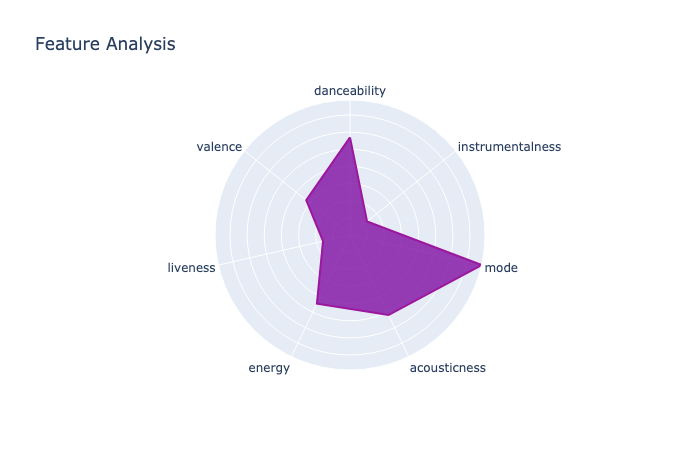

In [174]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

features = df[["danceability","instrumentalness","mode",
               "acousticness","energy","liveness","valence"]]
# analysis_chart(features)

fig1 = px.line_polar(features,r=features.mean(),
                    theta=features.columns,
                    template="plotly",
                    title="Feature Analysis",
                    line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r[6:])
fig1.update_polars({
        "radialaxis": dict(showticklabels=False, ticks='')
})
fig1.update_traces(fillcolor='rgba(128,15,163,0.8)')
fig1.update_polars(radialaxis={"showline":False})
fig1.update_traces(fill='toself')
# fig1.write_html("polar.html",auto_open=True)
fig1.write_image("polar.png",format="png",engine="orca")
fig1.show("png")

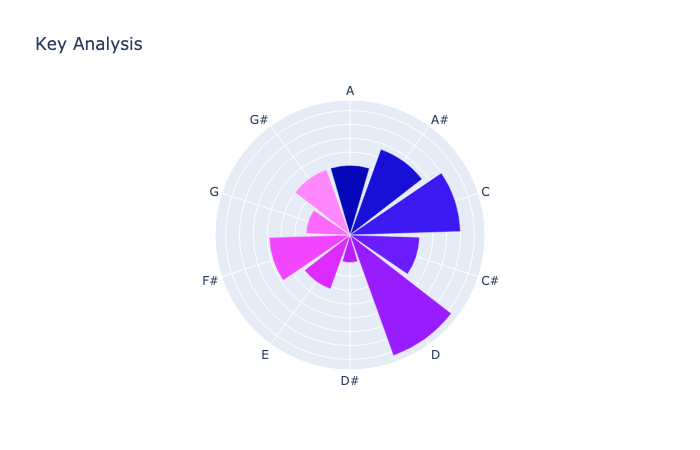

In [178]:
def key_analysis(df):
    count = np.power(df.groupby(["key"])["key"].count(),1/1.5)
    fig = px.bar_polar(count,
                        r = count.values,
                        theta=count.index,
                        template="plotly",
                        color=count.index,
                        title="Key Analysis",
                        color_discrete_sequence=px.colors.sequential.Plotly3)
    #                     
    fig.update_polars({
            "radialaxis": dict(showticklabels=False, ticks=''),
            "angularaxis": dict(showticklabels=True, ticks='')
    })
    fig["layout"]["legend"]["title"]["text"] = "Key"
    return fig
fig2 = key_analysis(df)
fig2.update_polars(radialaxis={"showline":False})
fig2.update_layout(showlegend=False)
fig2.show("png")
fig2.write_image("keyanalysis.png",format="png",engine="orca")

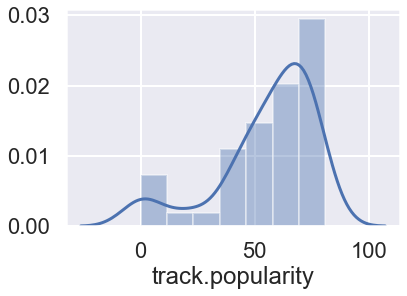

In [194]:
sns.set("poster")
plt.figure()
sns.distplot(df["track.popularity"])
